In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

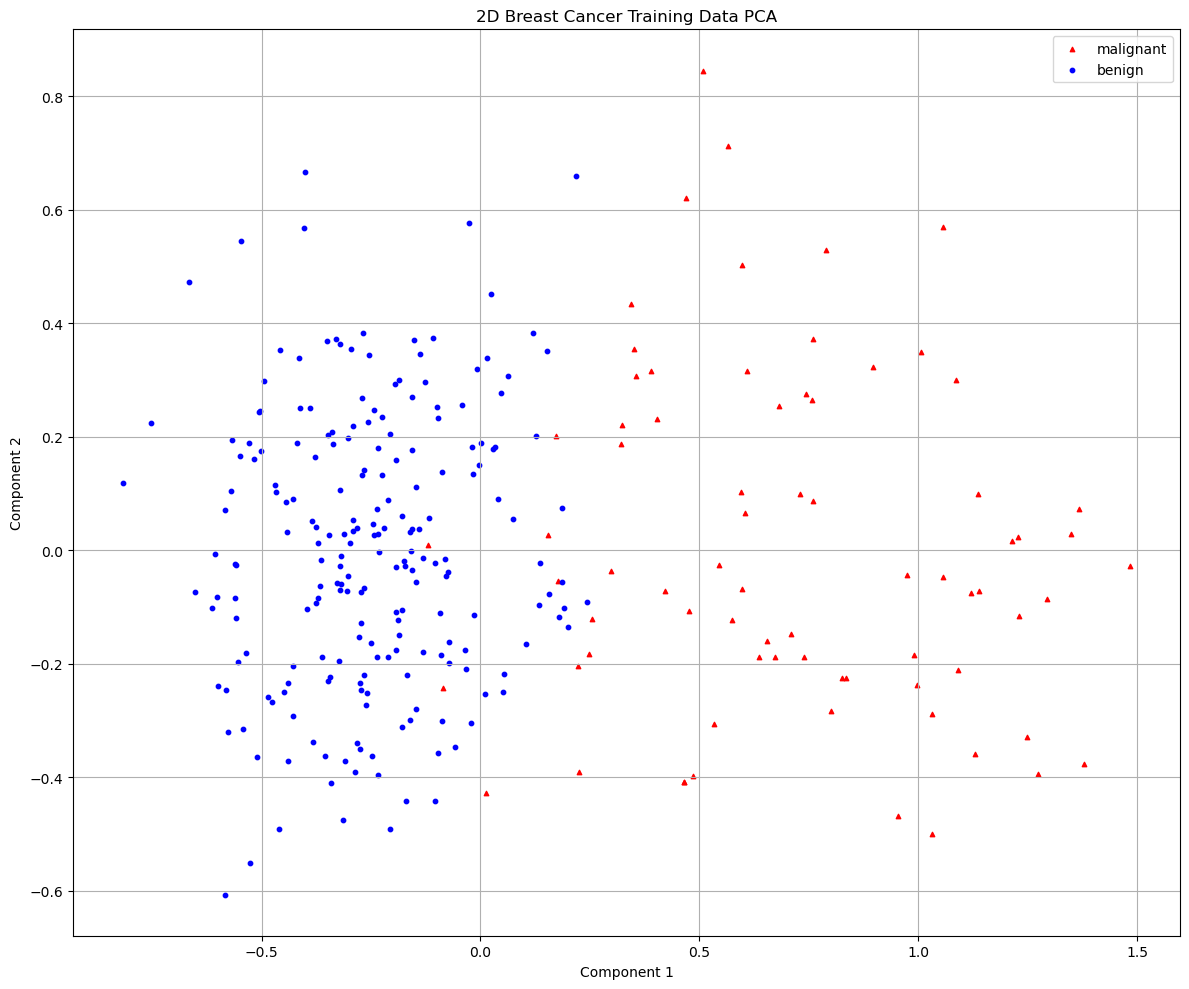

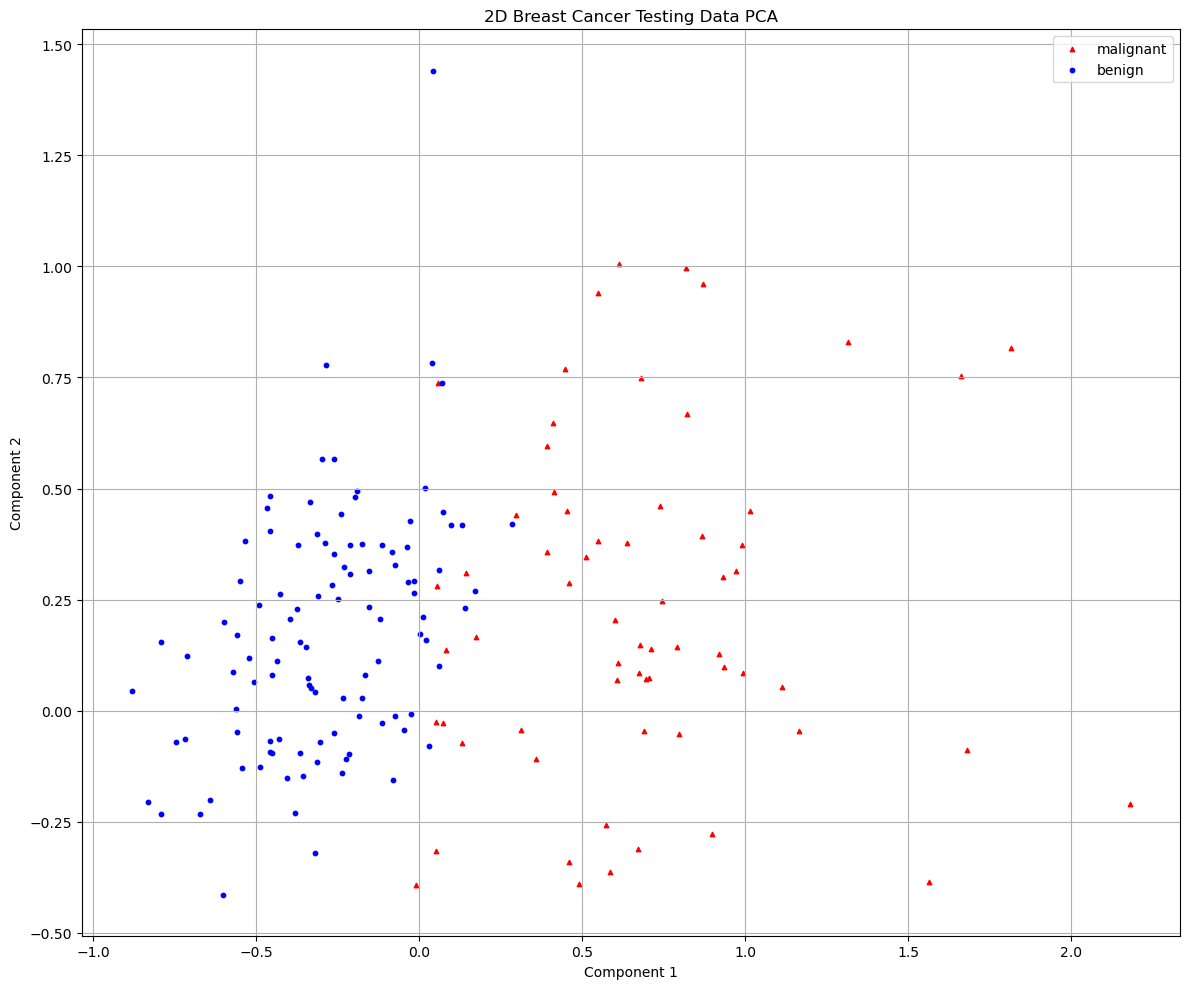

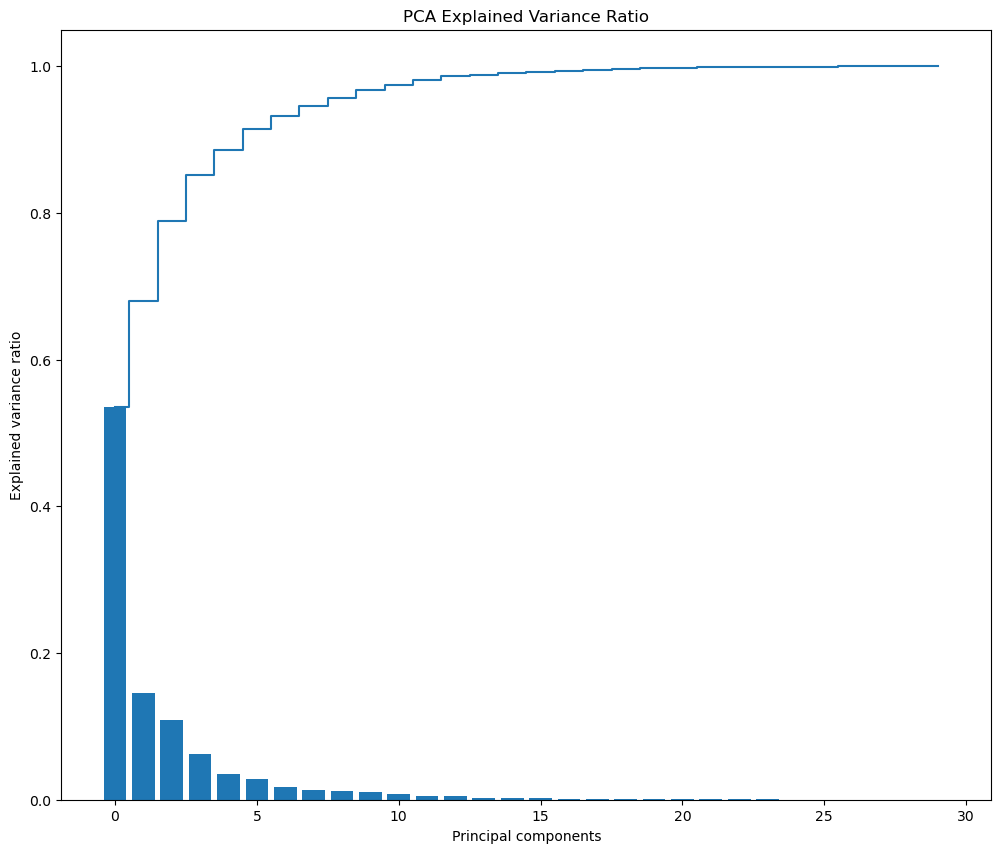

In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'dbscan', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {})

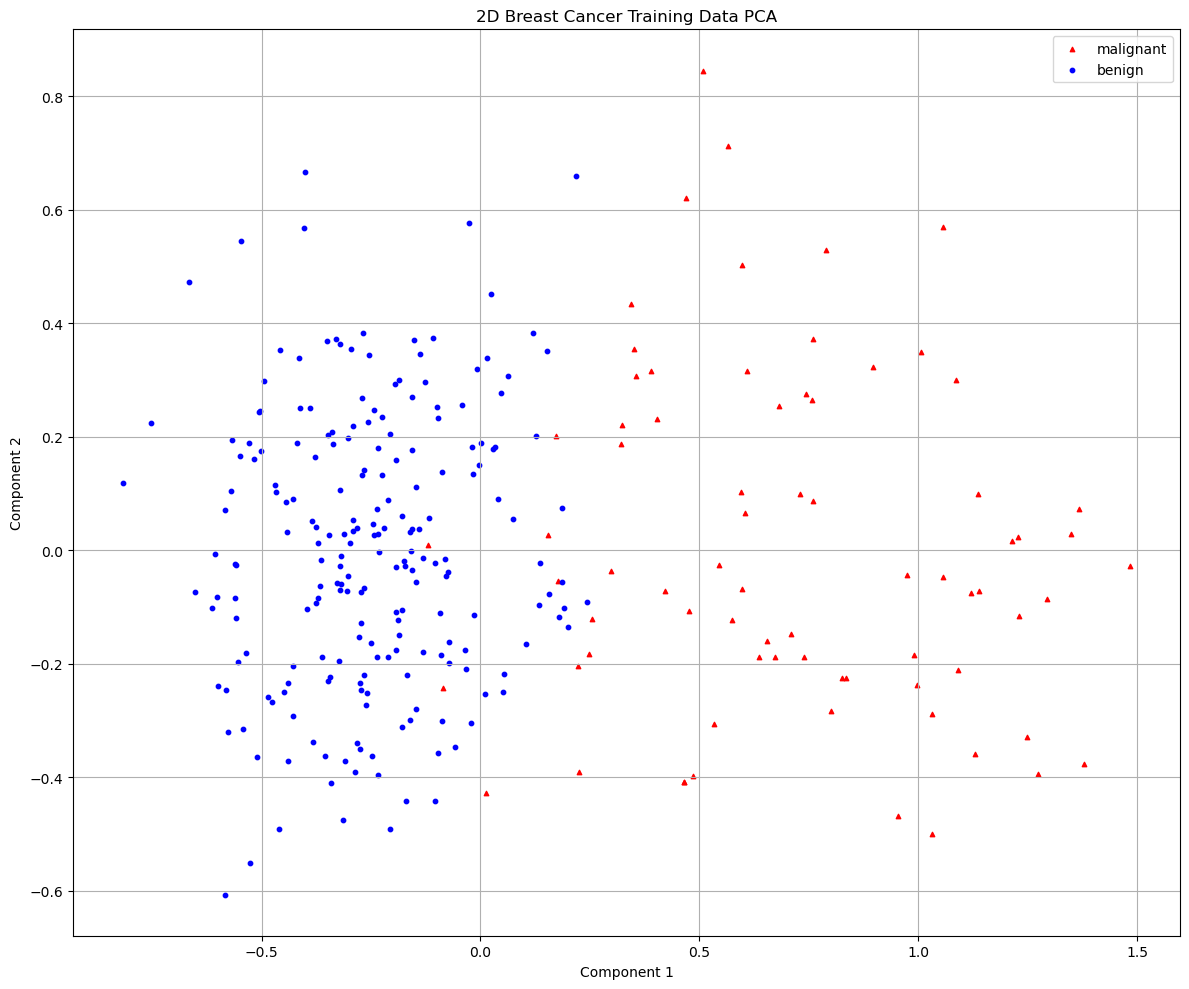

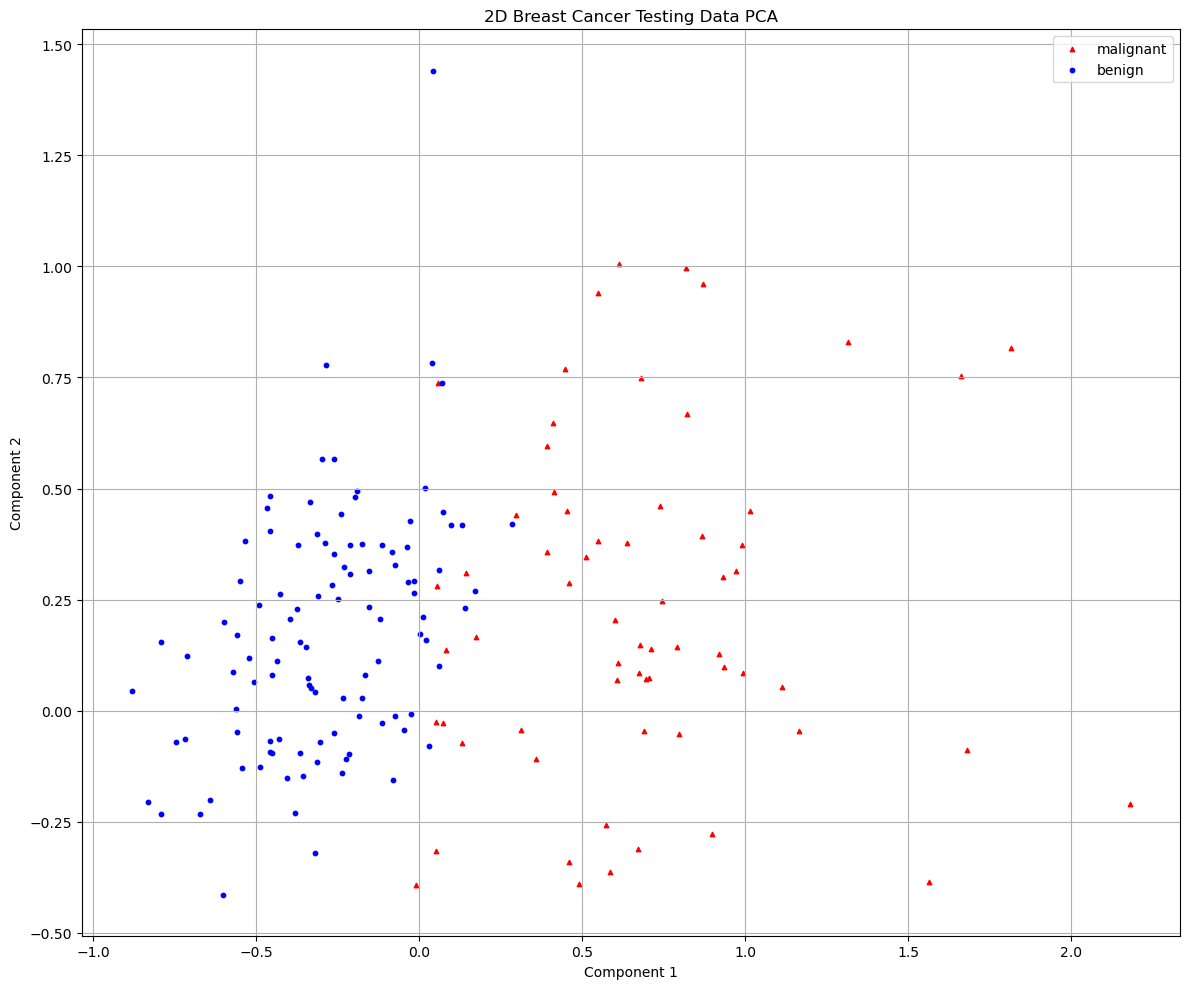

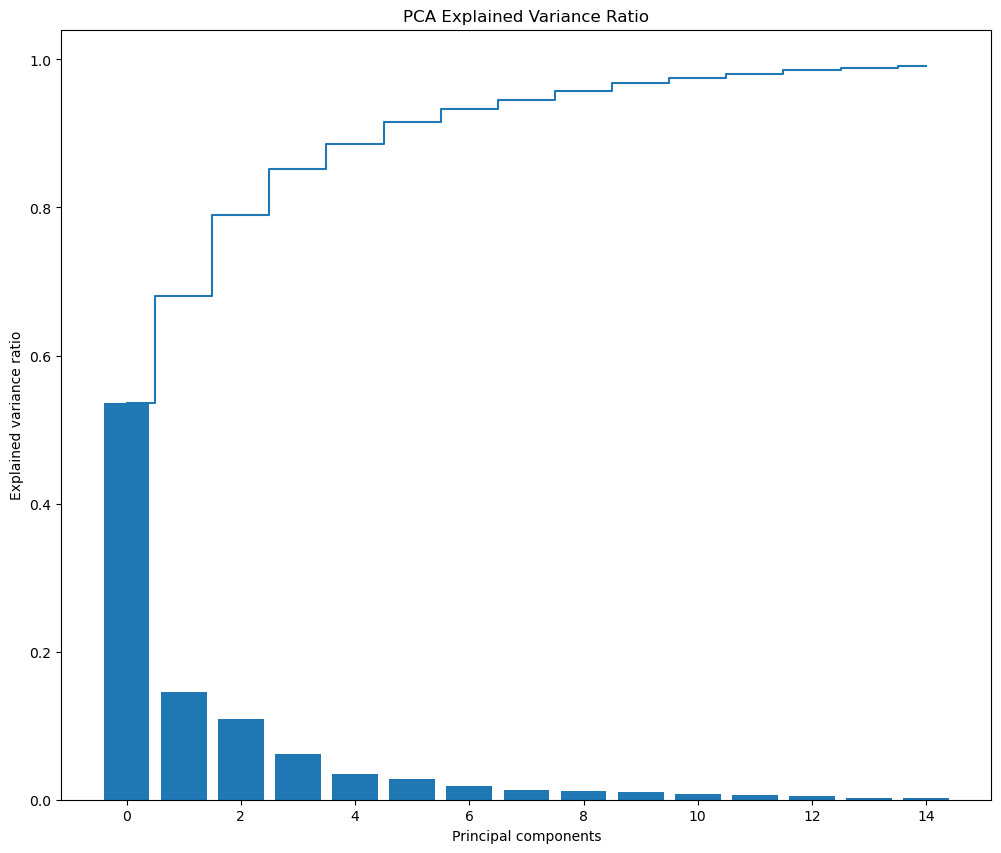

[I 2025-04-27 03:11:13,181] A new study created in memory with name: no-name-2ac05bd9-ec34-497a-8f0a-43d5abdcd5c9
[I 2025-04-27 03:11:19,176] Trial 0 finished with value: 0.9754990925589837 and parameters: {'n_estimators': 6725, 'learning_rate': 0.00221444511748823, 'num_leaves': 12, 'max_depth': 3, 'min_child_samples': 66, 'subsample': 0.9190221465043359, 'colsample_bytree': 0.5971933986152063, 'reg_alpha': 0.037780320525649884, 'reg_lambda': 0.0009227834834998583}. Best is trial 0 with value: 0.9754990925589837.
[I 2025-04-27 03:11:20,554] Trial 1 finished with value: 0.971990320629159 and parameters: {'n_estimators': 2185, 'learning_rate': 0.004289325796805644, 'num_leaves': 35, 'max_depth': 4, 'min_child_samples': 81, 'subsample': 0.999807603536164, 'colsample_bytree': 0.7032357650302591, 'reg_alpha': 0.96311257985553, 'reg_lambda': 0.10896948107632574}. Best is trial 0 with value: 0.9754990925589837.
[I 2025-04-27 03:11:20,799] Trial 2 finished with value: 0.9722323049001815 and p

Best trial:
Accuracy: 0.9860254083484573
Best hyperparameters:  {'n_estimators': 8450, 'learning_rate': 0.20683864211639194, 'num_leaves': 83, 'max_depth': 9, 'min_child_samples': 39, 'subsample': 0.4262117613498269, 'colsample_bytree': 0.5211555253513973, 'reg_alpha': 4.41680140928586e-08, 'reg_lambda': 1.5052973829337345e-07}


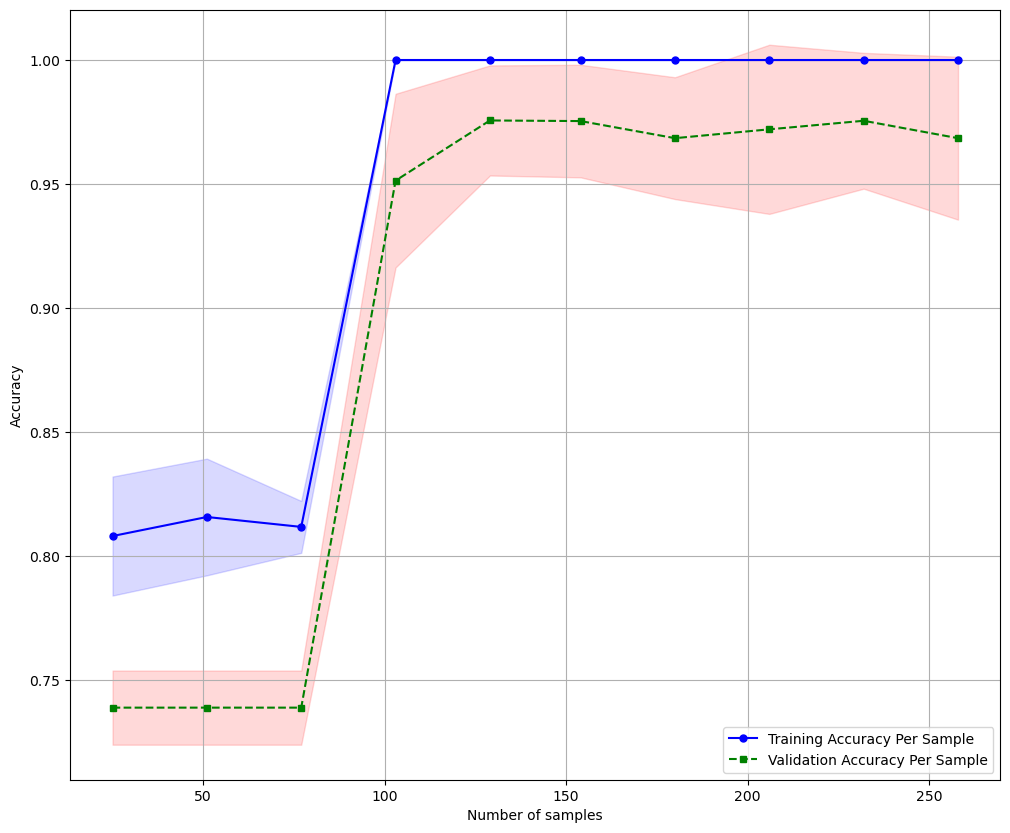

Confusion Matrix
[[ 55   9]
 [  4 103]]
Accuracy: 0.9240, Precision: 0.9196, Recall: 0.9626, F1: 0.9406, AUC:0.9663


In [3]:
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {'n_components': 15})
helper.train_and_evaluate_model('lgbm', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)